In [85]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
from rlway.pyosrd import OSRD

In [87]:
OSRD.use_cases

['cvg_dvg',
 'point_switch',
 'station_capacity2',
 'straight_line',
 'straight_line_with_blocks']

In [88]:
use_case='straight_line'
sim = OSRD(use_case=use_case, dir='tmp')

[09:55:18,977] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[09:55:19,009] [INFO]              [FullInfra] parsing infra
[09:55:19,069] [INFO]              [FullInfra] adaptation to kotlin
[09:55:19,095] [INFO]              [FullInfra] loading signals
[09:55:19,101] [INFO]              [FullInfra] building blocks
[09:55:19,106] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[09:55:19,120] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.14
[09:55:19,167] [DEBUG]             [Allowance] computing range n°1
[09:55:19,169] [DEBUG]             [Allowance]   computing section n°1
[09:55:19,170] [DEBUG]             [Allowance]   target time = 274.13399999999996
[09:55:19,170] [DEBUG]             [Allowance]     starting attempt 1
[09:55:19,171] [DEBUG]             [Allowance]     envelope time 452.323
[09:55:19,171] [DEBUG]             [Allowance]     starting attempt 2
[09:55:19,171] [DEBUG]             [Allo

In [89]:
sim.train_track_sections(0)

[{'id': 'T', 'direction': 'START_TO_STOP'}]

In [90]:
sim.space_time_chart_plotly(1, points_to_show=['signal','station'], eco_or_base='base')

In [91]:
from rlway.schedule_from_osrd import schedule_from_osrd

<Axes: xlabel='Time', ylabel='Track sections'>

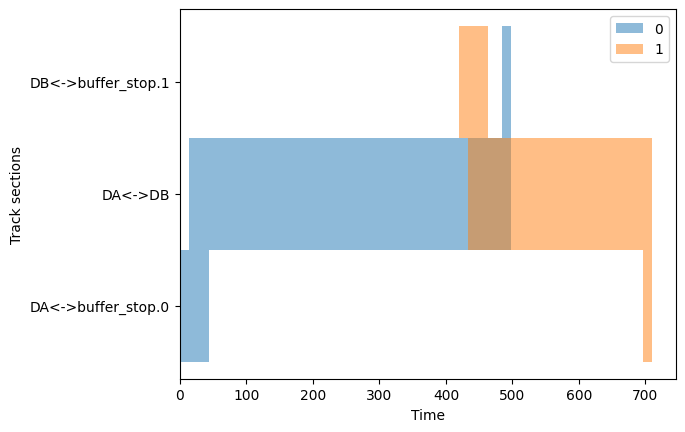

In [92]:
s = schedule_from_osrd(sim, eco_or_base='eco')
s.plot()

In [93]:
s.draw_graph()

In [98]:
sim.tvd_blocks

{'DA<->buffer_stop.0': 'DA<->buffer_stop.0',
 'DA<->DB': 'DA<->DB',
 'DB<->buffer_stop.1': 'DB<->buffer_stop.1'}

In [95]:
sim.entry_signals

[{'DA<->buffer_stop.0': None, 'DA<->DB': 'SA', 'DB<->buffer_stop.1': 'SA'},
 {'DB<->buffer_stop.1': None, 'DA<->DB': 'SB', 'DA<->buffer_stop.0': 'SB'}]

In [96]:
sim.route_lengths

{'rt.buffer_stop.0->DA': 500.0,
 'rt.DA->buffer_stop.1': 9500.0,
 'rt.DB->buffer_stop.0': 9500.0,
 'rt.buffer_stop.1->DB': 500.0}

In [97]:
sim.points_encountered_by_train(0)

[{'id': 'departure_train0',
  'offset': 0.0,
  'type': 'departure',
  't_base': 0.0,
  't_tail_base': 41.70430867666085,
  't_eco': 0.0,
  't_tail_eco': 44.031648996328045},
 {'id': 'stationA',
  'offset': 0.0,
  'type': 'station',
  't_base': 0.0,
  't_tail_base': 41.70430867666085,
  't_eco': 0.0,
  't_tail_eco': 44.031648996328045},
 {'id': 'SA',
  'offset': 20.0,
  'type': 'signal',
  't_base': 9.144667412541061,
  't_tail_base': 42.74656814636778,
  't_eco': 9.654992456990582,
  't_tail_eco': 45.13207253982913},
 {'id': 'DA',
  'offset': 40.0,
  'type': 'detector',
  't_base': 12.998915836005082,
  't_tail_base': 43.7888276160747,
  't_eco': 13.724330113259978,
  't_tail_eco': 46.232496083330226},
 {'id': 'DB',
  'offset': 9040.0,
  'type': 'detector',
  't_base': 484.8575177223986,
  't_tail_base': 498.0575177223986,
  't_eco': 504.070668055113,
  't_tail_eco': 517.8165384604949},
 {'id': 'stationB',
  'offset': 9080.0,
  'type': 'station',
  't_base': 498.0575177223986,
  't_tai